# Plotting Tools

In [1]:
import os
import csv

import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

### Basic plotting example

(1, 10)


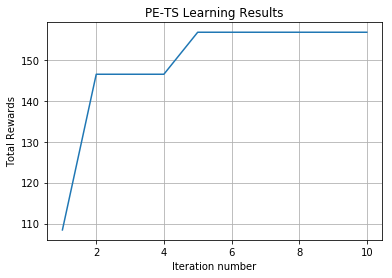

In [14]:
log_dir = "scripts/log/11-16a"       # Directory specified in script, not including date+time
min_num_trials = 10   # Plots up to this many trials


returns = []
for subdir in os.listdir(log_dir):
    data = loadmat(os.path.join(log_dir, subdir, "logs.mat"))
    print(data["returns"].shape)
    if data["returns"].shape[1] >= min_num_trials:
        returns.append(data["returns"][0][:min_num_trials])
returns = np.array(returns)
returns = np.maximum.accumulate(returns, axis=-1)
mean = np.mean(returns, axis=0)

# Plot result
plt.figure()
plt.plot(np.arange(1, min_num_trials + 1), mean)
plt.title("PE-TS Learning Results")
plt.grid()
plt.xlabel("Iteration number")
plt.ylabel("Total Rewards")
plt.show()

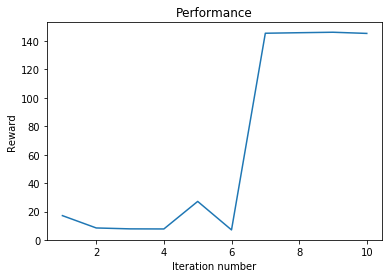

In [40]:
rewards = []
for subdir in os.listdir(log_dir):
    data = loadmat(os.path.join(log_dir, subdir, "logs.mat"))
    if data["rewards"].shape[1] >= min_num_trials:
        rewards.append(data["rewards"][0][:min_num_trials])
rewards = np.array(rewards)
mean = [np.sum(reward[0][:-1]) for reward in rewards[0]]
# Plot result
plt.figure()
plt.plot(np.arange(1, min_num_trials + 1), mean)
plt.title("Performance")
plt.xlabel("Iteration number")
plt.ylabel("Reward")
plt.show()

In [16]:
data.keys()

dict_keys(['returns', 'observations', '__version__', '__header__', 'actions', 'rewards', '__globals__'])

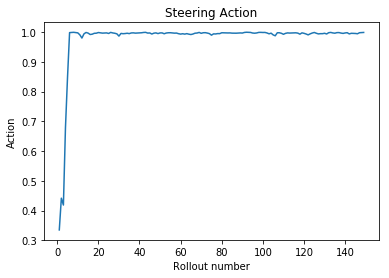

In [44]:
actions = []
for subdir in os.listdir(log_dir):
    data = loadmat(os.path.join(log_dir, subdir, "logs.mat"))
    if data["actions"].shape[1] >= min_num_trials:
        actions.append(data["actions"][0][:min_num_trials])
actions = np.array(rewards)
actions = [reward[0][:-1] for reward in rewards[0]]
# Plot result
plt.figure()
plt.plot(np.arange(1, len(actions[-2])+1), actions[-2])
plt.title("Steering Action")
plt.xlabel("Rollout number")
plt.ylabel("Action")
plt.show()